In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
import random

In [12]:
# Create MEGA dataset
data_A = pd.read_csv("current_csv_files/data_A.csv")
data_B = pd.read_csv("current_csv_files/data_B.csv")
data_C = pd.read_csv("current_csv_files/data_C.csv")

test_A = pd.read_csv("current_csv_files/test_A.csv")
test_B = pd.read_csv("current_csv_files/test_B.csv")
test_C = pd.read_csv("current_csv_files/test_C.csv")

In [13]:
data_A['A'] = 1
data_A['B'] = 0
data_A['C'] = 0

data_B['A'] = 0
data_B['B'] = 1
data_B['C'] = 0

data_C['A'] = 0
data_C['B'] = 0
data_C['C'] = 1

test_A['A'] = 1
test_A['B'] = 0
test_A['C'] = 0

test_B['A'] = 0
test_B['B'] = 1
test_B['C'] = 0

test_C['A'] = 0
test_C['B'] = 0
test_C['C'] = 1

In [14]:
data_ALL = pd.concat([data_A, data_B, data_C], ignore_index=True)
test_ALL = pd.concat([test_A, test_B, test_C], ignore_index=True)

In [15]:
test_ALL = test_ALL.sort_values(by=['A', 'B', 'C', 'date_forecast'], ascending=[False, False, False, True])

In [16]:
"""
data_ALL.to_csv("current_csv_files/data_ALL.csv", index=False)
test_ALL.to_csv("current_csv_files/test_ALL.csv", index=False)
"""

'\ndata_ALL.to_csv("current_csv_files/data_ALL.csv", index=False)\ntest_ALL.to_csv("current_csv_files/test_ALL.csv", index=False)\n'

In [17]:
# Drop the 'date_forecast' column as we already have extracted time features
data_ALL = data_ALL.drop(columns=['date_forecast'])
test_ALL = test_ALL.drop(columns=['date_forecast'])
test_ALL = test_ALL.drop(columns=['date_calc'])

In [18]:
data_ALL.columns, test_ALL.columns

(Index(['target', 'absolute_humidity_2m:gm3', 'air_density_2m:kgm3',
        'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_or_rime:idx',
        'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
        'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
        'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
        'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
        'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
        'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
        'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
        'sfc_pressure:hPa', 'snow_depth:cm', 'snow_drift:idx',
        'snow_melt_10min:mm', 'snow_water:kgm2', 'sun_azimuth:d',
        'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K',
        'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms',
        'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'wind_speed_w_1000hPa:ms',
        'month

In [19]:
# Separate features and target variable
X = data_ALL.drop('target', axis=1)
y = data_ALL['target']

# Normalize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Checking the shapes of the splits
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((69982, 50), (17496, 50), (69982,), (17496,))

In [20]:
# Insert all data
X_train = X_scaled
y_train = y
scaler2 = StandardScaler()
X_test = scaler2.fit_transform(test_ALL)

[72, 60, 95, 73, 92, 68]
Epoch 1/4
2461/2461 [==============================] - 3s 959us/step - loss: 126.6782 - val_loss: 26.4607
Epoch 2/4
2461/2461 [==============================] - 2s 895us/step - loss: 111.7215 - val_loss: 25.1275
Epoch 3/4
2461/2461 [==============================] - 2s 912us/step - loss: 108.1851 - val_loss: 23.1557
Epoch 4/4
68/68 [==============================] - 0s 446us/step


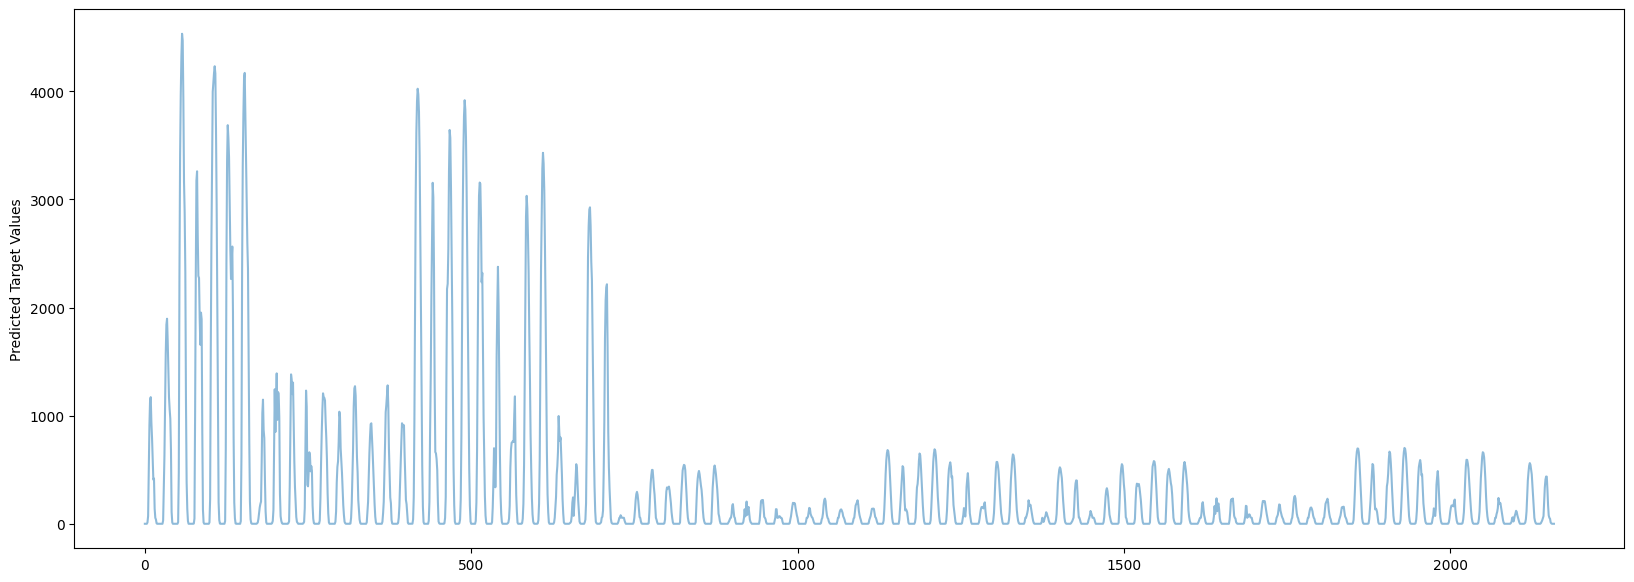

Epoch 1/4
2461/2461 [==============================] - 2s 934us/step - loss: 124.9031 - val_loss: 24.7575
Epoch 2/4
2461/2461 [==============================] - 2s 914us/step - loss: 111.2425 - val_loss: 23.3733
Epoch 3/4
2461/2461 [==============================] - 2s 897us/step - loss: 108.0458 - val_loss: 23.3982
Epoch 4/4
68/68 [==============================] - 0s 416us/step


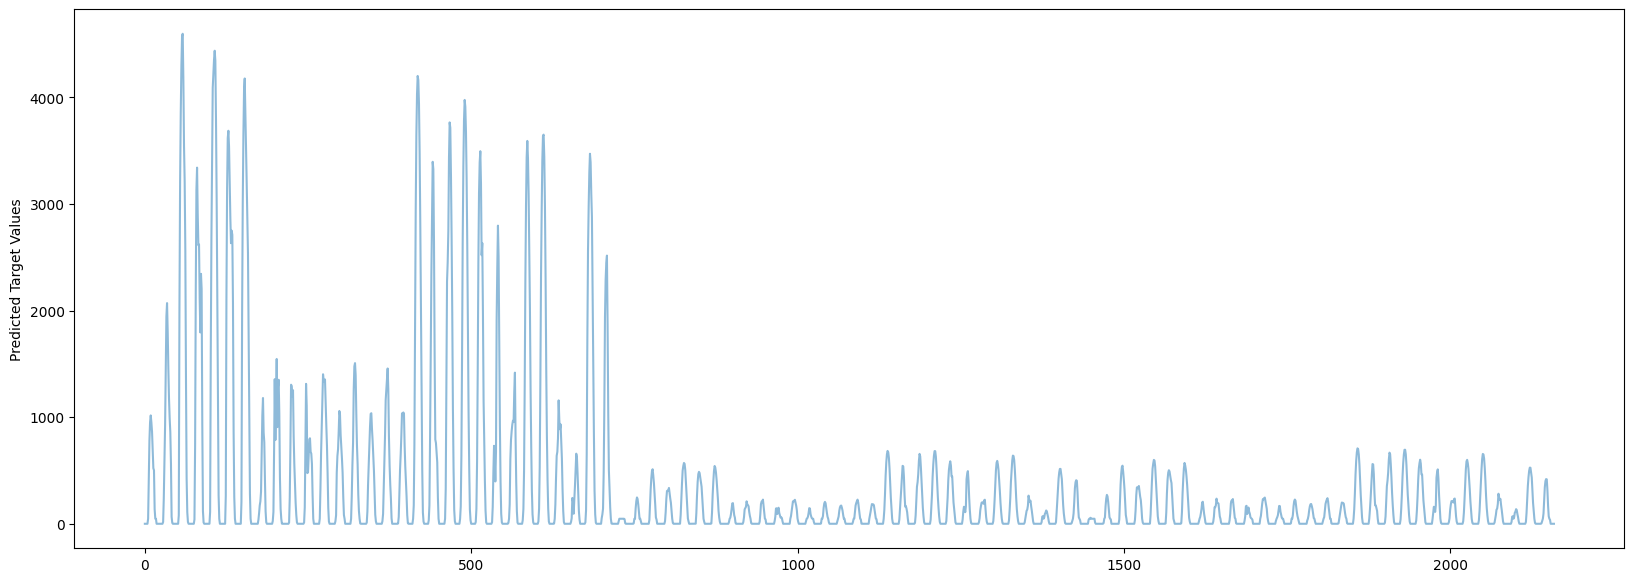

Epoch 1/4
2461/2461 [==============================] - 2s 909us/step - loss: 126.2423 - val_loss: 32.5892
Epoch 2/4
2461/2461 [==============================] - 2s 926us/step - loss: 110.9325 - val_loss: 27.2443
Epoch 3/4
2461/2461 [==============================] - 2s 921us/step - loss: 108.5749 - val_loss: 23.0186
Epoch 4/4
68/68 [==============================] - 0s 433us/step


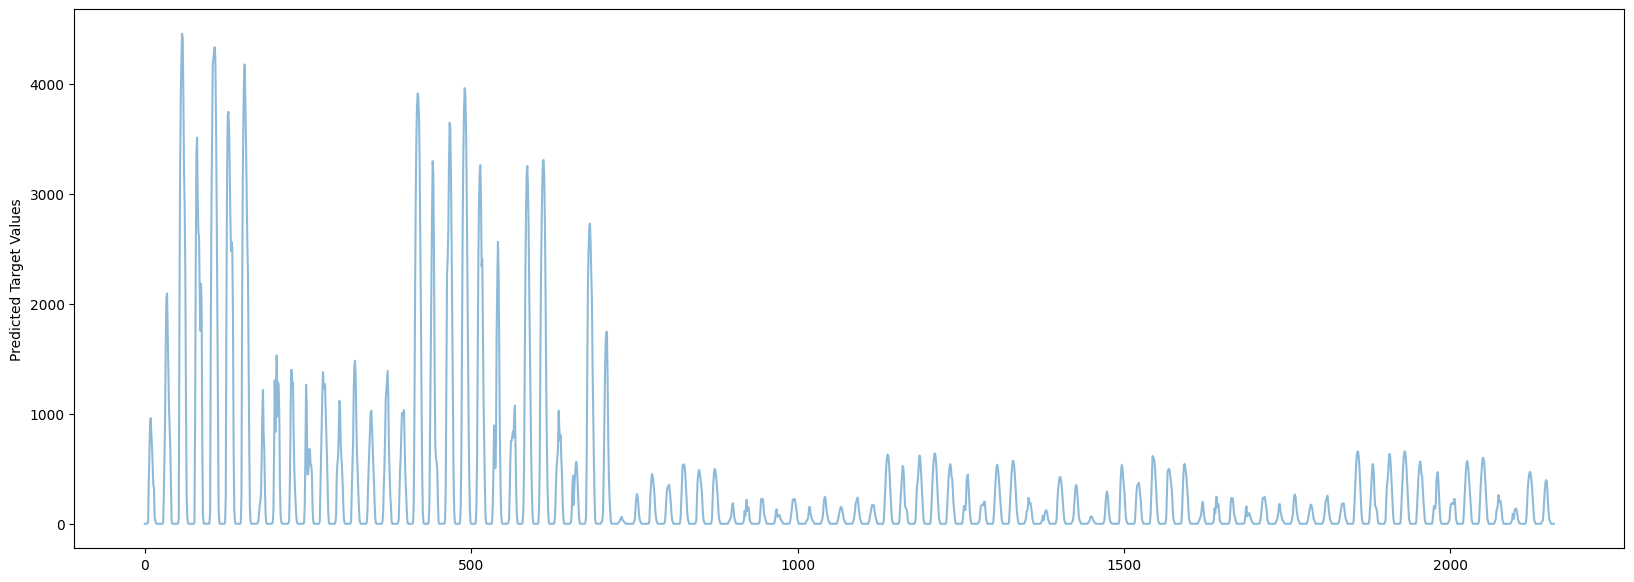

Epoch 1/4
2461/2461 [==============================] - 2s 923us/step - loss: 344.6736 - val_loss: 65.9839
Epoch 2/4
2461/2461 [==============================] - 2s 907us/step - loss: 344.6336 - val_loss: 65.9839
Epoch 3/4
68/68 [==============================] - 0s 461us/step


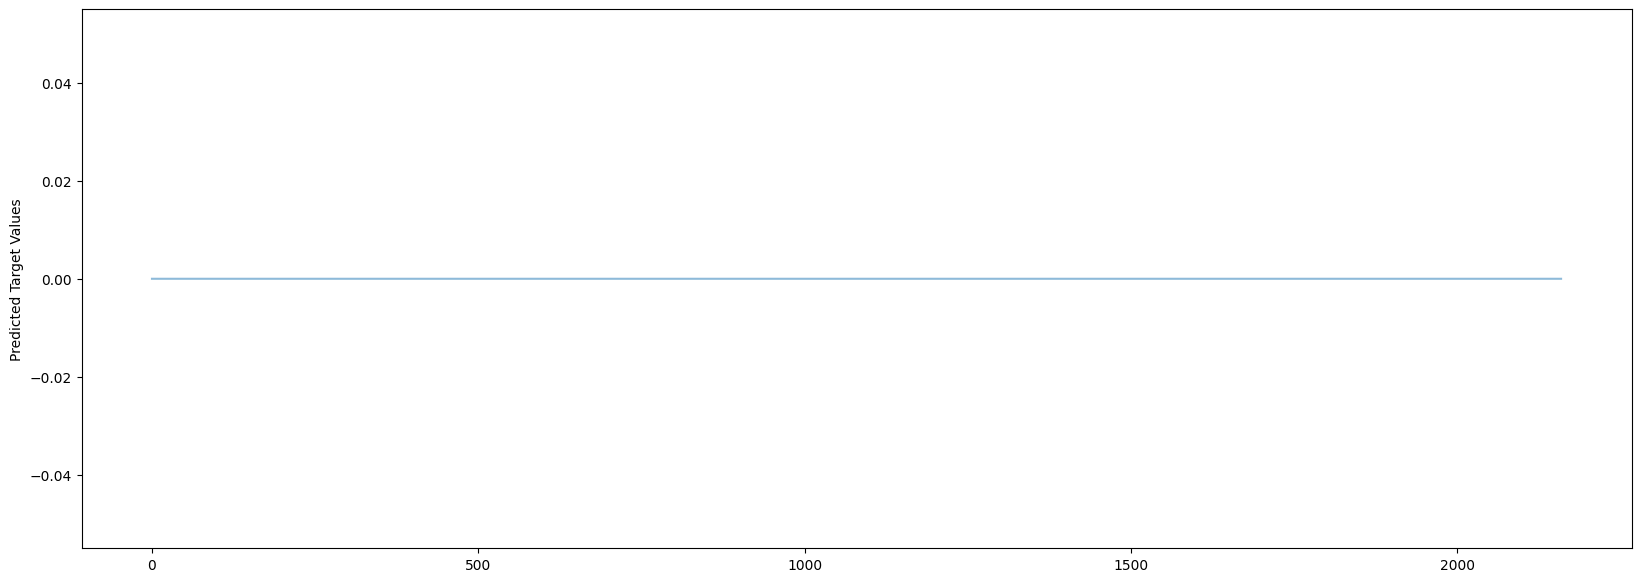

Epoch 1/4
2461/2461 [==============================] - 2s 917us/step - loss: 125.3314 - val_loss: 27.5204
Epoch 2/4
2461/2461 [==============================] - 2s 906us/step - loss: 112.2651 - val_loss: 23.7389
Epoch 3/4
2461/2461 [==============================] - 2s 927us/step - loss: 108.8406 - val_loss: 23.9360
Epoch 4/4
68/68 [==============================] - 0s 441us/step


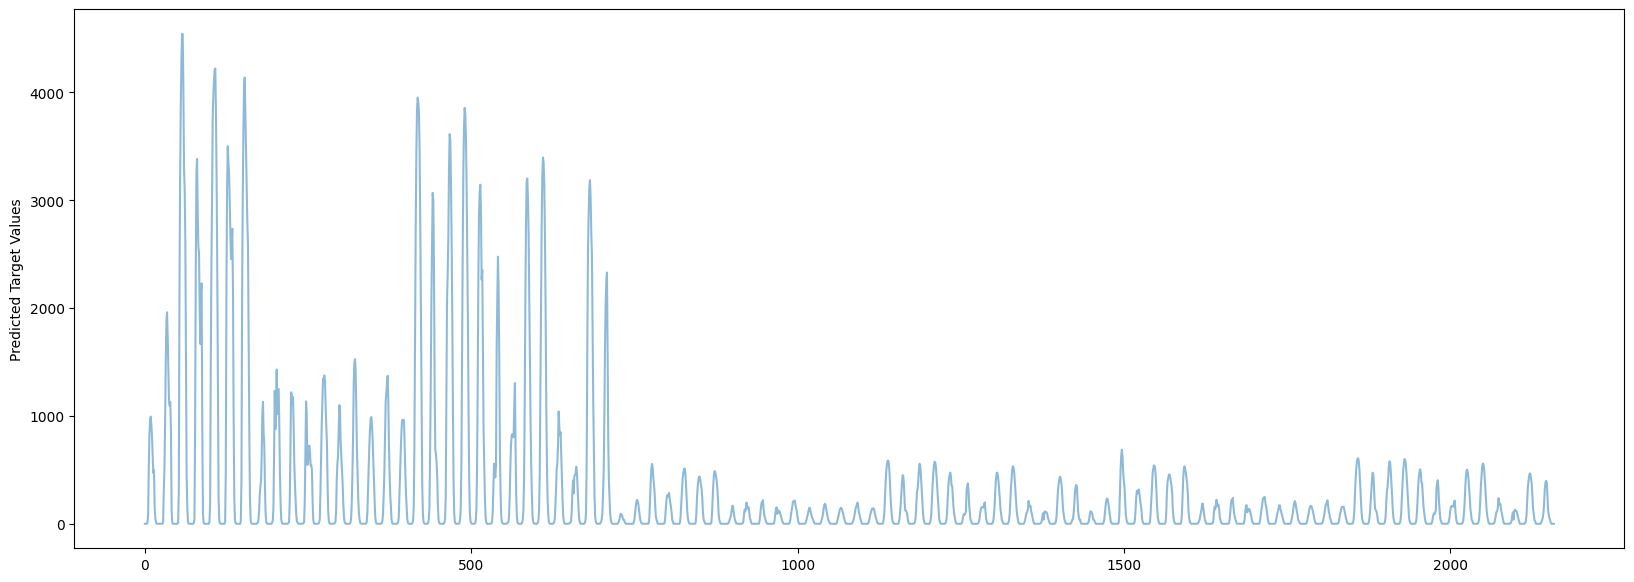

Epoch 1/4
2461/2461 [==============================] - 3s 965us/step - loss: 126.5806 - val_loss: 23.3854
Epoch 2/4
2461/2461 [==============================] - 2s 951us/step - loss: 112.7704 - val_loss: 26.3831
Epoch 3/4
68/68 [==============================] - 0s 612us/step


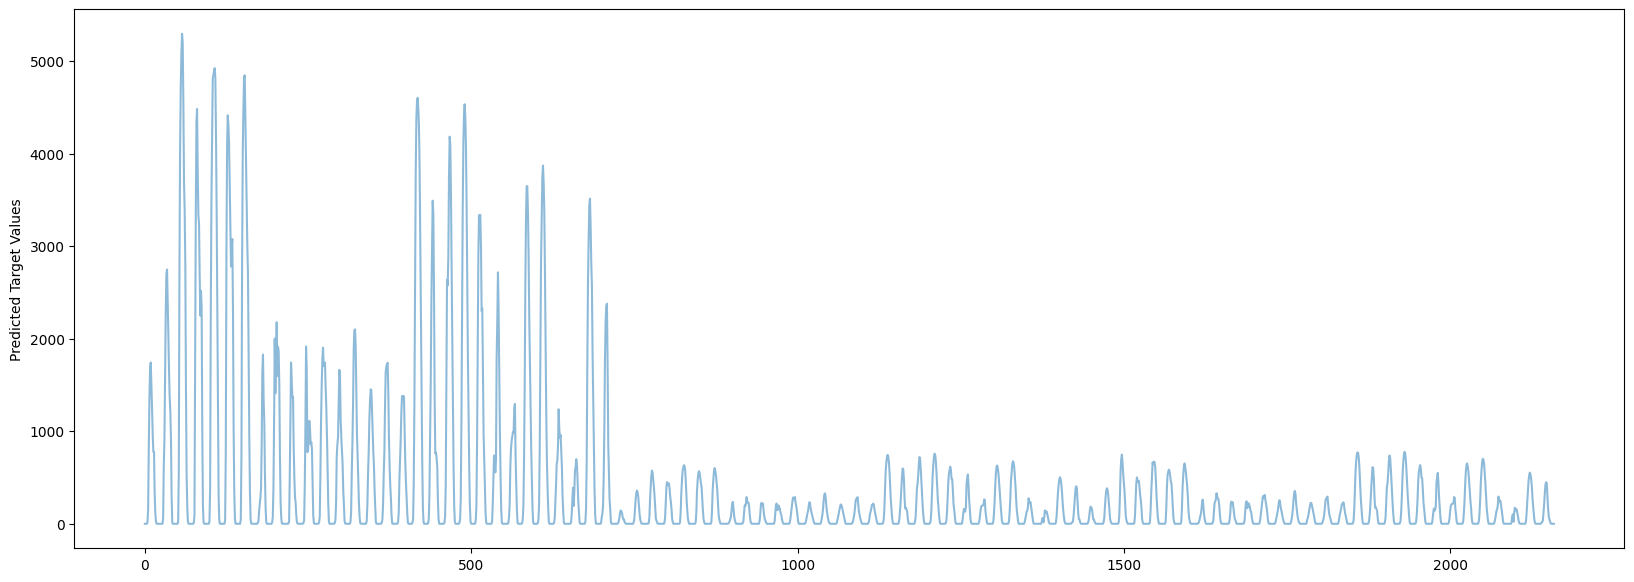

Epoch 1/4
2461/2461 [==============================] - 3s 962us/step - loss: 125.2879 - val_loss: 26.3975
Epoch 2/4
2461/2461 [==============================] - 2s 944us/step - loss: 111.5767 - val_loss: 24.3310
Epoch 3/4
2461/2461 [==============================] - 2s 941us/step - loss: 108.6823 - val_loss: 26.5790
Epoch 4/4
68/68 [==============================] - 0s 455us/step


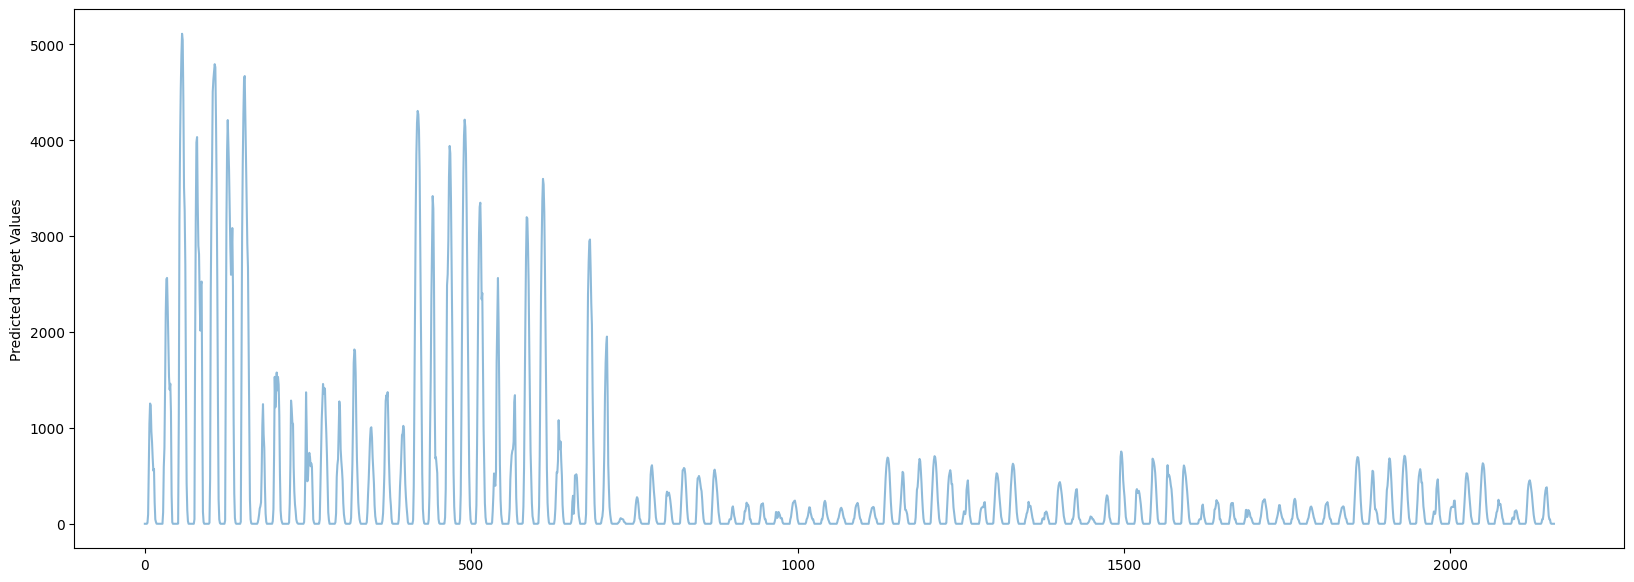

Epoch 1/4
2461/2461 [==============================] - 3s 973us/step - loss: 126.3959 - val_loss: 25.8408
Epoch 2/4
2461/2461 [==============================] - 2s 912us/step - loss: 112.2309 - val_loss: 25.5166
Epoch 3/4
2461/2461 [==============================] - 2s 904us/step - loss: 108.0559 - val_loss: 24.1950
Epoch 4/4
68/68 [==============================] - 0s 468us/step


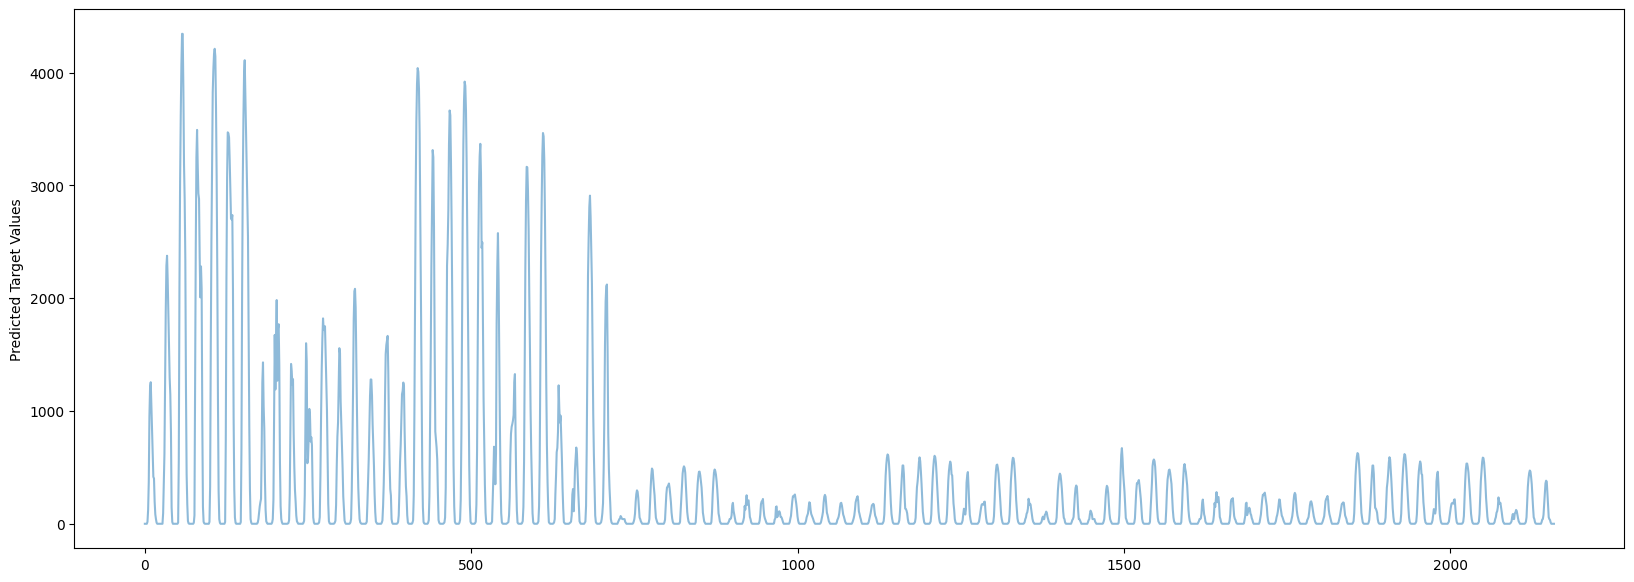

Epoch 1/4
2461/2461 [==============================] - 3s 987us/step - loss: 125.9385 - val_loss: 24.7664
Epoch 2/4
2461/2461 [==============================] - 2s 947us/step - loss: 111.0919 - val_loss: 33.8287
Epoch 3/4
68/68 [==============================] - 0s 457us/step


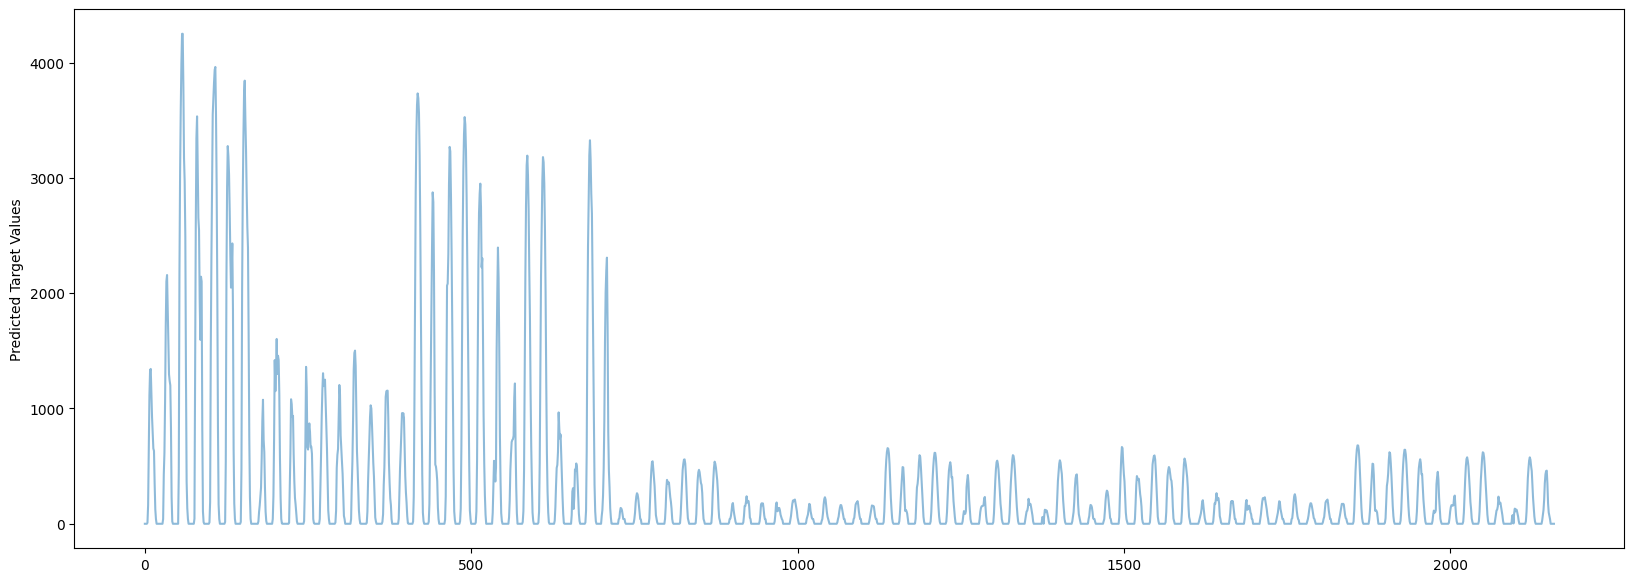

Epoch 1/4
2461/2461 [==============================] - 3s 993us/step - loss: 344.6745 - val_loss: 65.9839
Epoch 2/4
2461/2461 [==============================] - 2s 942us/step - loss: 344.6335 - val_loss: 65.9839
Epoch 3/4
68/68 [==============================] - 0s 444us/step


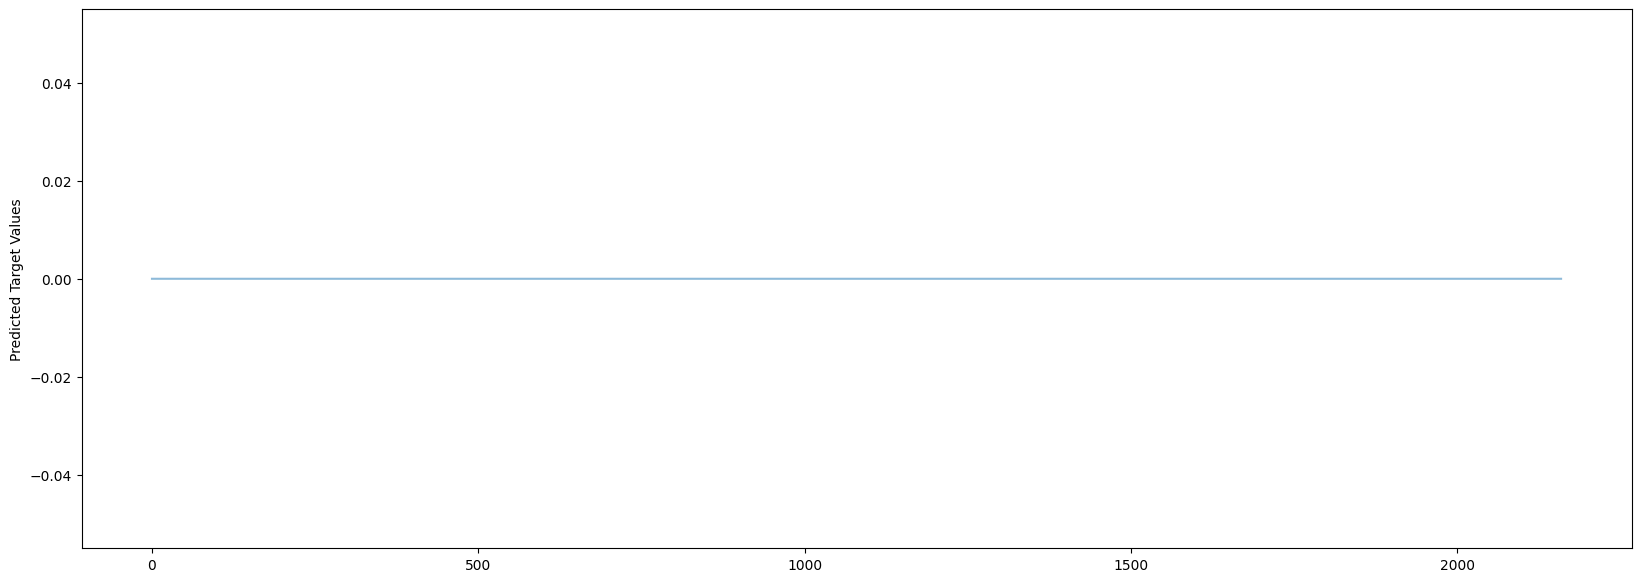

In [22]:
# Define the Keras model
seeds = [ random.randint(0, 100) for _ in range(6) ]
#seeds = [29, 31, 45, 75, 39, 76]
inits = [ HeNormal(seed=s) for s in seeds ]

print(seeds)

N = 10
nets = []
preds = []

for i in range(N):
    """
    # Filter out x% of training data. Only for kaggle predictions
    all_indices = np.arange(X_train.shape[0])
    train_indices = np.random.choice(all_indices, int(0.8 * X_train.shape[0]), replace=False)
    excluded_indices = np.setdiff1d(all_indices, train_indices)

    train_indices.sort()
    excluded_indices.sort()
    
    X_train_subsample = X_train.iloc[train_indices]
    y_train_subsample = y_train.iloc[train_indices]

    # Create a test set from the excluded rows
    X_test_specific = X_train.iloc[excluded_indices]
    y_test_specific = y_train.iloc[excluded_indices]
    """

    model = Sequential([
        Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_initializer=inits[0]),
        Dropout(0.2, (256,), seed=seeds[5]),
        Dense(128, activation='relu', kernel_initializer=inits[1]),
        Dense(128, activation='relu', kernel_initializer=inits[2], kernel_regularizer=l2(0.05)),
        Dense(64, activation='relu', kernel_initializer=inits[3]),
        Dense(1, activation='relu', kernel_initializer=inits[4])
    ])
    nets.append(model)

    opt = Adam(learning_rate=0.01, beta_1=0.90)
    model.compile(loss='mean_absolute_error', optimizer=opt)

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=1, patience=2)

    # Fit the model
    history = model.fit(X_train, y_train, validation_split=0.1, epochs=4, batch_size=32, 
                        callbacks=[early_stopping]
    )
    #history = model.fit(X_train_subsample, y_train_subsample, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

    # Make predictions. One for local, one for kaggle
    prediction = model.predict(X_test)
    #prediction = model.predict(X_test_specific)
    preds.append(prediction)

    plt.figure(figsize=(20, 7))
    plt.plot(prediction, alpha=0.5)
    plt.ylabel('Predicted Target Values')
    plt.show()

    # Test prediction. One for local, one for kaggle
    #print(i, " MAE: ", mean_absolute_error(y_test, prediction))
    #print(i, " MAE: ", mean_absolute_error(y_test_specific, prediction))
    

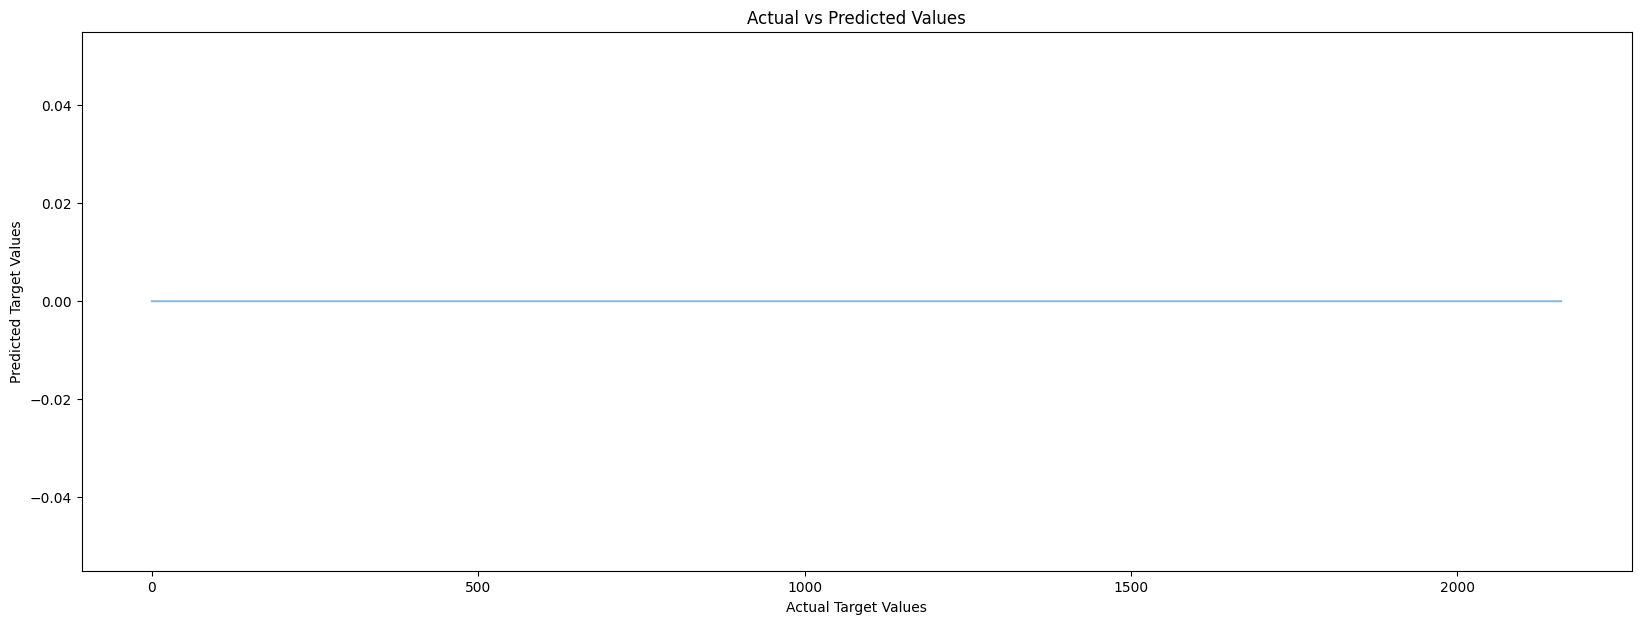

In [111]:
plt.figure(figsize=(20, 7))
plt.plot(preds[5], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.show()

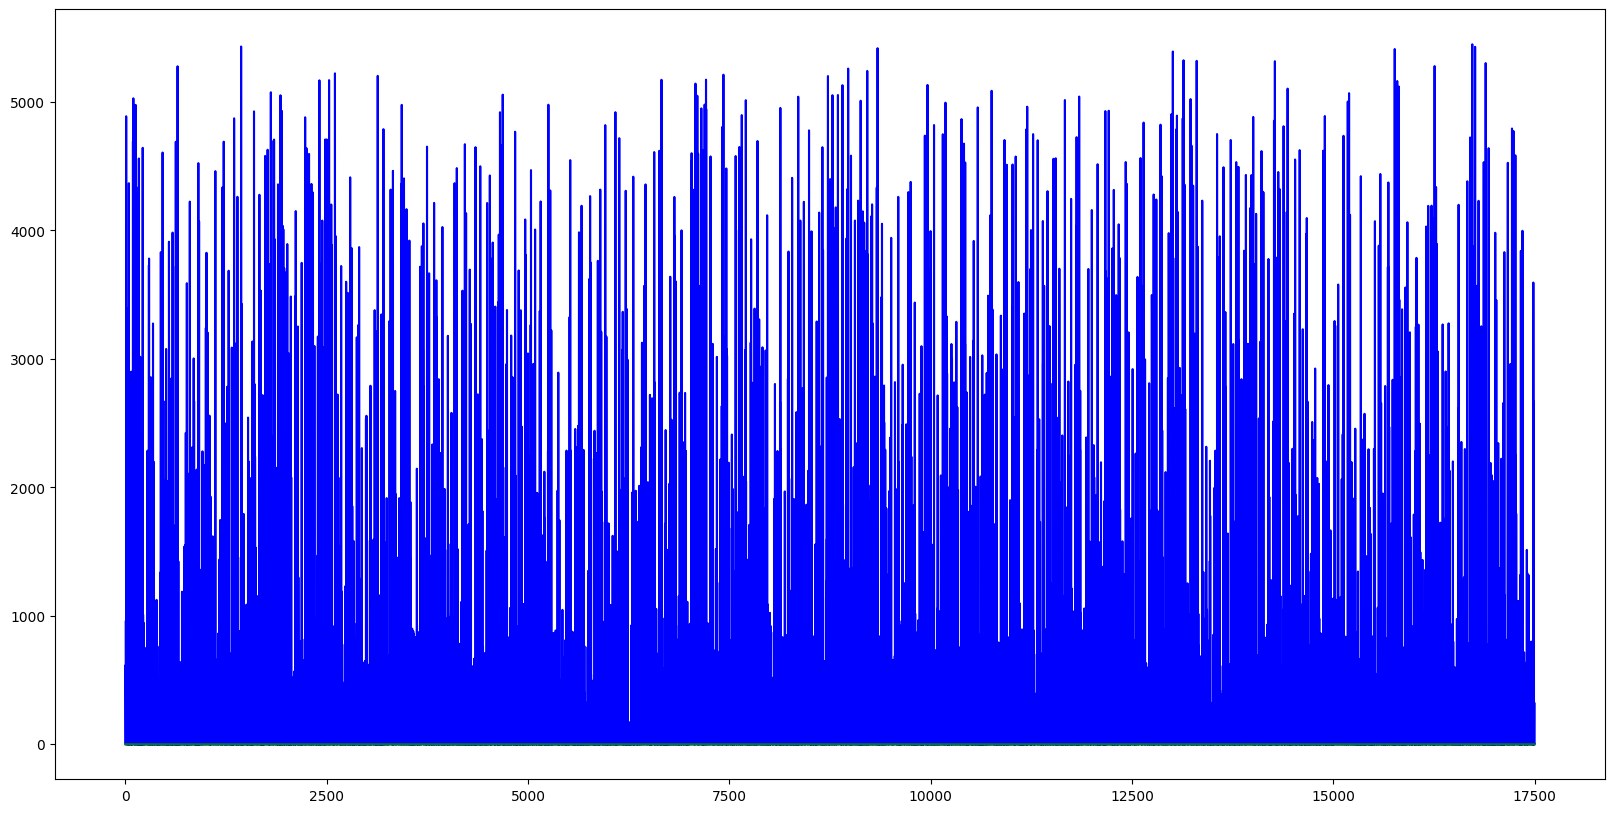

In [53]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(y_test)), preds[3], color='green')
plt.show()

In [24]:
df_data = {
    '0':preds[0].ravel(),
    '1':preds[1].ravel(),
    '2':preds[2].ravel(),
    '4':preds[4].ravel(),
    '5':preds[5].ravel(),
    '6':preds[6].ravel(),
    '7':preds[7].ravel(),
    '8':preds[8].ravel(),
}

In [25]:
df = pd.DataFrame(
    data=df_data
    )


In [30]:
df['prediction'] = df.mean(axis=1)
df

,0,1,2,4,5,6,7,8,average,prediction
0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,12.150002,0.0,3.306781,6.811839,13.910717,9.46509,17.190674,9.154351,8.998681,8.998681
...,...,...,...,...,...,...,...,...,...,...
2155,3.538174,0.0,0.000000,1.236791,0.000000,0.00000,0.000000,0.000000,0.596871,0.596871
2156,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2157,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2158,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [28]:
pred_avg = df['average'].to_list()
#print("MAE: ", mean_absolute_error(y_test, pred_avg))

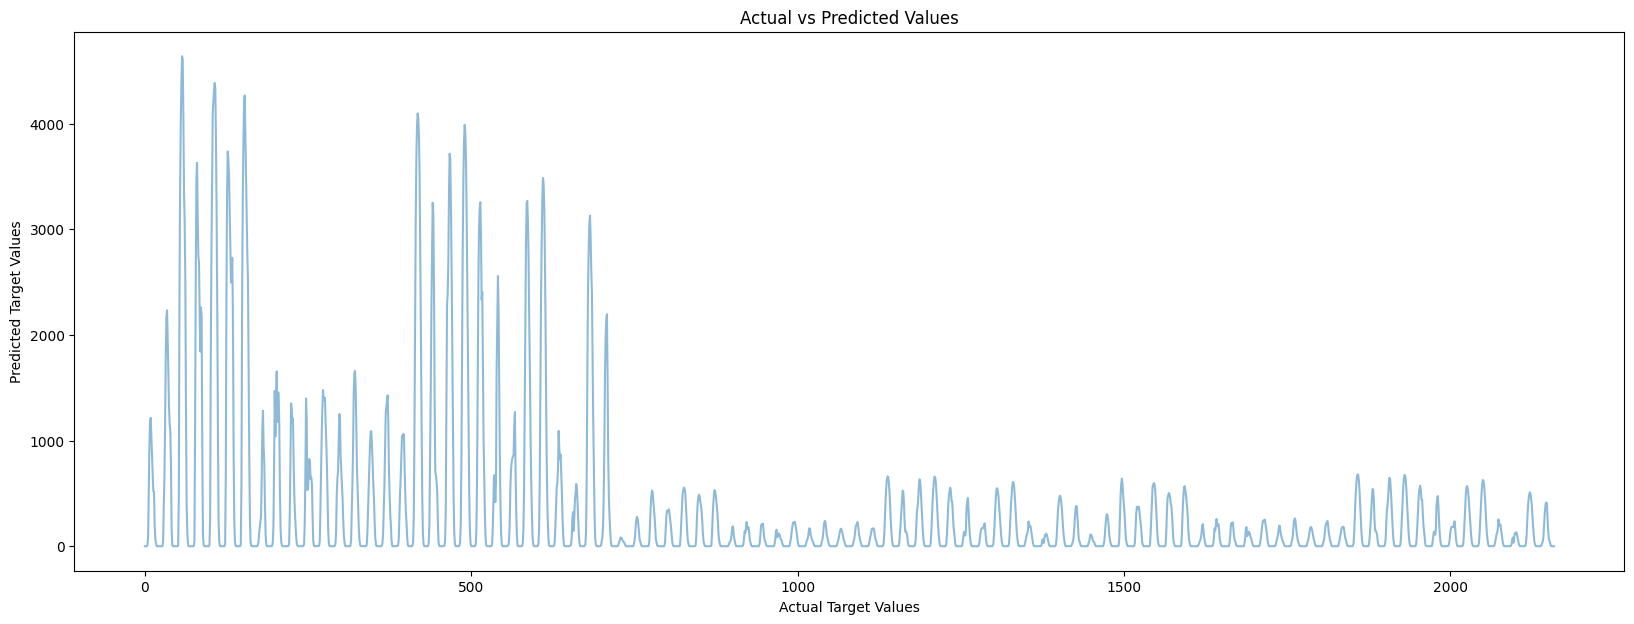

In [29]:
plt.figure(figsize=(20, 7))
plt.plot(pred_avg, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.show()

In [31]:
df['prediction'].to_csv("teo_subs/teo_sub_3.csv", index=True)